In [1]:
#data analysis
import pandas as pd
import numpy as np

#data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_data = pd.read_csv("train.csv", low_memory=False)
test_data = pd.read_csv("test.csv", low_memory=False)
#changing the Transported columns to numerical
tt = train_data["Transported"].values.astype(object).astype(int)
train_data["Transported"] = tt
train_data.head()
print("_"*40)
train_data.info()
print("_"*40)
train_data.isna().sum()
print("_"*40)
train_data.describe()

________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   int32  
dtypes: float64(6), int32(1), object(7)
memory usage: 917.0+ KB
________________________________________
________________________________________


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8693.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791,0.503624
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189,0.500016
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000,1.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1.000000


In [3]:
train_data.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [4]:
#i have to split train data into numerical and categorical features
#i have to clean data and fill Null values with mean or median
#i have to run feature selection on the numerical features to see select the features that highly contributes to the survival of the passenger
#i have to plot a heatmap to check how the numerical features are correlated(``only needed in regression problems`` but i'll just do it)
#i have to run the same process with the categorical features as i did with nemerical
#data preprocessing: combine my cleaned dataset i.e the categorical and numerical
#split my new data sets into training sets
#apply machine learning model
#tune hyperparameters
#make predictions on the test data

In [8]:
catd = train_data.select_dtypes(np.number)
catd.isna().sum()

Age             179
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [9]:
qatd = train_data.select_dtypes(object)
qatd.isna().sum()

PassengerId      0
HomePlanet     201
CryoSleep      217
Cabin          199
Destination    182
VIP            203
Name           200
dtype: int64

In [10]:
train_data.isnull().sum()/len(train_data)

PassengerId     0.000000
HomePlanet      0.023122
CryoSleep       0.024963
Cabin           0.022892
Destination     0.020936
Age             0.020591
VIP             0.023352
RoomService     0.020821
FoodCourt       0.021051
ShoppingMall    0.023927
Spa             0.021051
VRDeck          0.021627
Name            0.023007
Transported     0.000000
dtype: float64

In [11]:
for label, contents in catd.items():
    if pd.api.types.is_numeric_dtype(contents):
        if pd.isnull(contents).sum():
            print(label)

Age
RoomService
FoodCourt
ShoppingMall
Spa
VRDeck


In [12]:
#fill missing values with median
for label, contents in catd.items():
    if pd.api.types.is_numeric_dtype(contents):
        if pd.isnull(contents).sum():
            
            #add a binary column which tells us what data is missing
#             catd[label+"is_missing"] = pd.isnull(contents)
            #fill missing numeric values with median
            catd[label] = contents.fillna(contents.median())

In [13]:
catd.isna().sum()

Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [14]:
catd.isnull().sum()/len(catd)

Age             0.0
RoomService     0.0
FoodCourt       0.0
ShoppingMall    0.0
Spa             0.0
VRDeck          0.0
Transported     0.0
dtype: float64

In [15]:
catd.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,39.0,0.0,0.0,0.0,0.0,0.0,0
1,24.0,109.0,9.0,25.0,549.0,44.0,1
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0
4,16.0,303.0,70.0,151.0,565.0,2.0,1


In [16]:
for label, contents in qatd.items():
    if not pd.api.types.is_numeric_dtype(contents):
        print(label)

PassengerId
HomePlanet
CryoSleep
Cabin
Destination
VIP
Name


In [17]:
for label, contents in qatd.items():
    if not pd.api.types.is_numeric_dtype(contents):
        qatd[label] = pd.Categorical(contents).codes+1

In [18]:
qatd.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
0,1,2,1,150,3,1,5253
1,2,1,1,2185,3,1,4503
2,3,2,1,2,3,2,458
3,4,2,1,2,3,1,7150
4,5,1,1,2187,3,1,8320


In [19]:
catd.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,39.0,0.0,0.0,0.0,0.0,0.0,0
1,24.0,109.0,9.0,25.0,549.0,44.0,1
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0
4,16.0,303.0,70.0,151.0,565.0,2.0,1


In [20]:
qatd.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
0,1,2,1,150,3,1,5253
1,2,1,1,2185,3,1,4503
2,3,2,1,2,3,2,458
3,4,2,1,2,3,1,7150
4,5,1,1,2187,3,1,8320


In [21]:
df_X = catd.drop("Transported", axis=1)
df_y = catd.Transported

In [22]:
df_X.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,39.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0
4,16.0,303.0,70.0,151.0,565.0,2.0


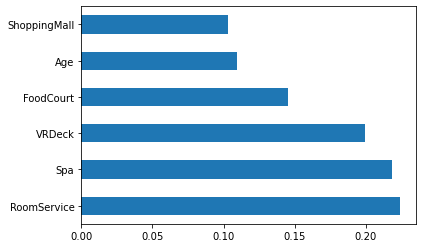

In [23]:
from sklearn.ensemble import ExtraTreesRegressor
ext = ExtraTreesRegressor().fit(df_X, df_y)
f_i = pd.Series(ext.feature_importances_, index = df_X.columns)
f_i.nlargest(10).plot(kind='barh');

In [24]:
numdr = catd[["RoomService", "Spa"]]
numdr.head()

,RoomService,Spa
0,0.0,0.0
1,109.0,549.0
2,43.0,6715.0
3,0.0,3329.0
4,303.0,565.0


In [25]:
catd.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,39.0,0.0,0.0,0.0,0.0,0.0,0
1,24.0,109.0,9.0,25.0,549.0,44.0,1
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0
4,16.0,303.0,70.0,151.0,565.0,2.0,1


In [34]:
# as you can see only these three highly contributes to the survival
# so i am going to drop the others 
#new_df_catd = catd.drop("Age", axis=1)
new_df_catd = catd.drop("FoodCourt", axis=1)
new_df_catd = new_df_catd.drop("ShoppingMall", axis=1)
new_df_catd = new_df_catd.drop("VRDeck", axis=1)
new_df_catd.head()

,Age,RoomService,Spa,Transported
0,39.0,0.0,0.0,0
1,24.0,109.0,549.0,1
2,58.0,43.0,6715.0,0
3,33.0,0.0,3329.0,0
4,16.0,303.0,565.0,1


In [35]:
new_df_catd.tail()

,Age,RoomService,Spa,Transported
8688,41.0,0.0,1643.0,0
8689,18.0,0.0,0.0,0
8690,26.0,0.0,1.0,1
8691,32.0,0.0,353.0,0
8692,44.0,126.0,0.0,1


In [36]:
qatd.head()

,Cabin,PassengerId,Name,CryoSleep
0,150,1,5253,1
1,2185,2,4503,1
2,2,3,458,1
3,2,4,7150,1
4,2187,5,8320,1


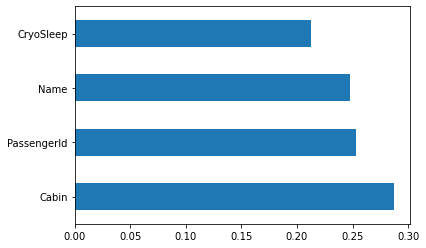

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectFromModel

def prepare(X):
    oe = OrdinalEncoder().fit(X)
    X_enc = pd.DataFrame(oe.transform(X))
    X_enc.columns = X.columns
    return X_enc
obj_enc = prepare(qatd)
clf = RandomForestClassifier().fit(obj_enc, df_y)
f_i = pd.Series(clf.feature_importances_, index=obj_enc.columns)
f_i.nlargest(10).plot(kind='barh');

In [38]:
# cabin, passengerid, name, cryosleep contributes to survial

cumdr = qatd[["Cabin", "PassengerId", "Name", "CryoSleep"]]
cumdr.head()

,Cabin,PassengerId,Name,CryoSleep
0,150,1,5253,1
1,2185,2,4503,1
2,2,3,458,1
3,2,4,7150,1
4,2187,5,8320,1


In [39]:
qatd.head()

,Cabin,PassengerId,Name,CryoSleep
0,150,1,5253,1
1,2185,2,4503,1
2,2,3,458,1
3,2,4,7150,1
4,2187,5,8320,1


In [40]:
qatd = cumdr
qatd.dtypes

Cabin          int16
PassengerId    int16
Name           int16
CryoSleep       int8
dtype: object

In [42]:
new_df = pd.concat([new_df_catd,qatd ], axis=1)
new_df.head()

,Age,RoomService,Spa,Transported,Cabin,PassengerId,Name,CryoSleep
0,39.0,0.0,0.0,0,150,1,5253,1
1,24.0,109.0,549.0,1,2185,2,4503,1
2,58.0,43.0,6715.0,0,2,3,458,1
3,33.0,0.0,3329.0,0,2,4,7150,1
4,16.0,303.0,565.0,1,2187,5,8320,1


In [ ]:
new_df_catd[]

In [36]:
X = new_df.drop("Transported", axis=1)
y = new_df.Transported

In [66]:
from sklearn.model_selection import train_test_split
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.29)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6172, 8), (2521, 8), (6172,), (2521,))

In [67]:
from sklearn.ensemble import RandomForestClassifier
# np.random.seed(42)

clf = RandomForestClassifier(n_estimators=100, random_state=0)

fitted = clf.fit(X_train, y_train)

model_score = clf.score(X_test, y_test)
model_score * 100

77.42959143197145

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [69]:
models = {"LinearSVC": LinearSVC(),
          "SVC": SVC(),
          "LogisticRegression": LogisticRegression(),
          "RandomForestClassifier": RandomForestClassifier}

In [70]:
results = {}
for model_name, model in models.items():
    clf.fit(X_train, y_train)
    results[model_name] = clf.score(X_test, y_test)

results

{'LinearSVC': 0.7742959143197145,
 'SVC': 0.7742959143197145,
 'LogisticRegression': 0.7742959143197145,
 'RandomForestClassifier': 0.7742959143197145}

In [71]:
np.random.seed(42)
results = {}
for model_name, model in models.items():
    clf.fit(X_train, y_train)
    results[model_name] = clf.score(X_test, y_test)

results

{'LinearSVC': 0.7742959143197145,
 'SVC': 0.7742959143197145,
 'LogisticRegression': 0.7742959143197145,
 'RandomForestClassifier': 0.7742959143197145}

In [72]:
results_df = pd.DataFrame(results.values(),
                          results.keys(),
                          columns=["accuracy"])
results_df

,accuracy
LinearSVC,0.774296
SVC,0.774296
LogisticRegression,0.774296
RandomForestClassifier,0.774296


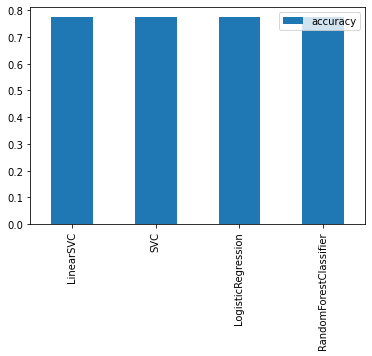

In [73]:
results_df.plot(kind='bar');

In [74]:
y_preds = clf.predict(X_test)
y_preds

array([0, 0, 1, ..., 1, 0, 1])

In [75]:
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [76]:
for label, contents in test_data.items():
    if not pd.api.types.is_numeric_dtype(contents):
        test_data[label] = pd.Categorical(contents).codes+1
        
#fill missing values with median
for label, contents in test_data.items():
    if pd.api.types.is_numeric_dtype(contents):
        if pd.isnull(contents).sum():
            
            #add a binary column which tells us what data is missing
#             catd[label+"is_missing"] = pd.isnull(contents)
            #fill missing numeric values with median
            test_data[label] = contents.fillna(contents.median())

In [77]:
new_df.head()

,Age,RoomService,Spa,VRDeck,Transported,Cabin,PassengerId,Name,CryoSleep
0,39.0,0.0,0.0,0.0,0,150,1,5253,1
1,24.0,109.0,549.0,44.0,1,2185,2,4503,1
2,58.0,43.0,6715.0,49.0,0,2,3,458,1
3,33.0,0.0,3329.0,193.0,0,2,4,7150,1
4,16.0,303.0,565.0,2.0,1,2187,5,8320,1


In [78]:
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,1,1,2,2785,3,27.0,1,0.0,0.0,0.0,0.0,0.0,2913
1,2,1,1,1868,3,19.0,1,0.0,9.0,0.0,2823.0,0.0,2407
2,3,2,2,258,1,31.0,1,0.0,0.0,0.0,0.0,0.0,3377
3,4,2,1,260,3,38.0,1,0.0,6652.0,0.0,181.0,585.0,2712
4,5,1,1,1941,3,20.0,1,10.0,0.0,635.0,0.0,0.0,669


In [79]:
new_data = test_data.drop("HomePlanet", axis=1)
new_data = new_data.drop("ShoppingMall", axis=1)
new_data = new_data.drop("Destination", axis=1)
new_data = new_data.drop("VIP", axis=1)
new_data = new_data.drop("FoodCourt", axis=1)
new_data.head()

,PassengerId,CryoSleep,Cabin,Age,RoomService,Spa,VRDeck,Name
0,1,2,2785,27.0,0.0,0.0,0.0,2913
1,2,1,1868,19.0,0.0,2823.0,0.0,2407
2,3,2,258,31.0,0.0,0.0,0.0,3377
3,4,1,260,38.0,0.0,181.0,585.0,2712
4,5,1,1941,20.0,10.0,0.0,0.0,669


In [80]:
X_train.head()

,Age,RoomService,Spa,VRDeck,Cabin,PassengerId,Name,CryoSleep
5533,62.0,0.0,0.0,0.0,2518,5534,3084,2
6080,20.0,0.0,0.0,0.0,748,6081,5932,2
621,38.0,0.0,0.0,0.0,851,622,2874,2
2126,47.0,0.0,85.0,3970.0,587,2127,892,1
6672,27.0,1216.0,43.0,0.0,2689,6673,8118,1


In [81]:
# now re-arrange th order to fit as the training data in order to remove warnings

In [82]:
new_data = new_data[['Age','RoomService','Spa','VRDeck','Cabin','PassengerId','Name','CryoSleep']]
new_data.head()

,Age,RoomService,Spa,VRDeck,Cabin,PassengerId,Name,CryoSleep
0,27.0,0.0,0.0,0.0,2785,1,2913,2
1,19.0,0.0,2823.0,0.0,1868,2,2407,1
2,31.0,0.0,0.0,0.0,258,3,3377,2
3,38.0,0.0,181.0,585.0,260,4,2712,1
4,20.0,10.0,0.0,0.0,1941,5,669,1


In [83]:
test_prediction = clf.predict(new_data)
test_prediction[:1000]

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,

In [84]:
sub = pd.read_csv("test.csv", low_memory=False)
sub.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [85]:
sub = sub.PassengerId
sub.head()

0    0013_01
1    0018_01
2    0019_01
3    0021_01
4    0023_01
Name: PassengerId, dtype: object

In [86]:
subdf = pd.DataFrame({"PassengerId":sub, "Transported":test_prediction,})
subdf.head()

,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,1


In [87]:
tt = subdf["Transported"].values.astype(int).astype(bool)

subdf["Transported"] = tt

In [88]:
subdf.head(400)

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
395,0837_01,True
396,0837_02,False
397,0838_01,True
398,0838_02,False


In [89]:
data_predictions = subdf
data_predictions.head(400)

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
395,0837_01,True
396,0837_02,False
397,0838_01,True
398,0838_02,False


In [90]:
data_predictions.to_csv("sample_submission.csv", index=False)